# Explonatory Data Analysis and Data Transformation on the Skin Cancer Dataset

Step 1: Understanding the Data

The columns are:
image: Image identifier.

age_approx: Approximate age of the patient.

anatom_site_general: General location of the lesion on the body.

lesion_id: Unique identifier for the lesion.

sex: Gender of the patient.

MEL, NV, BCC, AK, BKL, DF, VASC, SCC, UNK: These columns represent one-hot encoded labels for different lesion classes:

MEL: Melanoma

NV: Melanocytic Nevus

BCC: Basal Cell Carcinoma

AK: Actinic Keratosis

BKL: Benign Keratosis

DF: Dermatofibroma

VASC: Vascular Lesions

SCC: Squamous Cell Carcinoma

UNK: Unknown or other types

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
import torch

In [2]:
# Check if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [3]:
import pandas as pd

# Load the metadata and ground truth data
train_metadata = pd.read_csv('Dataset/ISIC_2019_Training_Metadata.csv')
train_ground_truth = pd.read_csv('Dataset/ISIC_2019_Training_GroundTruth.csv')
test_metadata = pd.read_csv('Dataset/ISIC_2019_Test_Metadata.csv')

In [4]:
6/train_data = pd.merge(train_metadata, train_ground_truth, on='image')

In [5]:
X = train_data.drop(columns=['image', 'MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'])
y = train_data[['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']]

In [6]:
#show the first 5 rows of the data
train_data.head()

,image,age_approx,anatom_site_general,lesion_id,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,55.0,anterior torso,NaN,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,30.0,anterior torso,NaN,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,60.0,upper extremity,NaN,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,30.0,upper extremity,NaN,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,80.0,posterior torso,NaN,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                25331 non-null  object 
 1   age_approx           24894 non-null  float64
 2   anatom_site_general  22700 non-null  object 
 3   lesion_id            23247 non-null  object 
 4   sex                  24947 non-null  object 
 5   MEL                  25331 non-null  float64
 6   NV                   25331 non-null  float64
 7   BCC                  25331 non-null  float64
 8   AK                   25331 non-null  float64
 9   BKL                  25331 non-null  float64
 10  DF                   25331 non-null  float64
 11  VASC                 25331 non-null  float64
 12  SCC                  25331 non-null  float64
 13  UNK                  25331 non-null  float64
dtypes: float64(10), object(4)
memory usage: 2.7+ MB


In [8]:
import pandas as pd

# Assuming df is your dataframe
train_data['target'] = train_data[['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']].idxmax(axis=1)

In [9]:
train_data.head()

,image,age_approx,anatom_site_general,lesion_id,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,target
0,ISIC_0000000,55.0,anterior torso,NaN,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
1,ISIC_0000001,30.0,anterior torso,NaN,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
2,ISIC_0000002,60.0,upper extremity,NaN,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
3,ISIC_0000003,30.0,upper extremity,NaN,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
4,ISIC_0000004,80.0,posterior torso,NaN,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL


In [10]:
# Display a sample of image filenames from the DataFrame
print(train_data['image'].head())

0    ISIC_0000000
1    ISIC_0000001
2    ISIC_0000002
3    ISIC_0000003
4    ISIC_0000004
Name: image, dtype: object


In [11]:
# Adding .jpg extension if missing
train_data['image'] = train_data['image'].apply(lambda x: x if x.endswith('.jpg') else f"{x}.jpg")

# Visualize Distributions

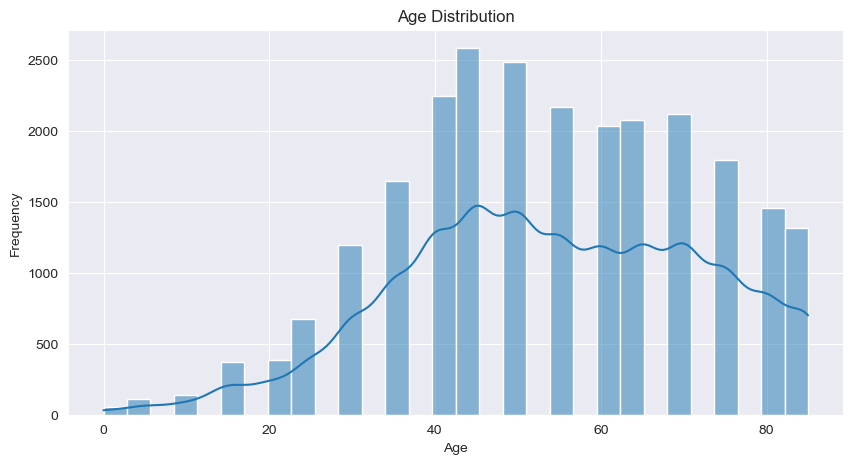

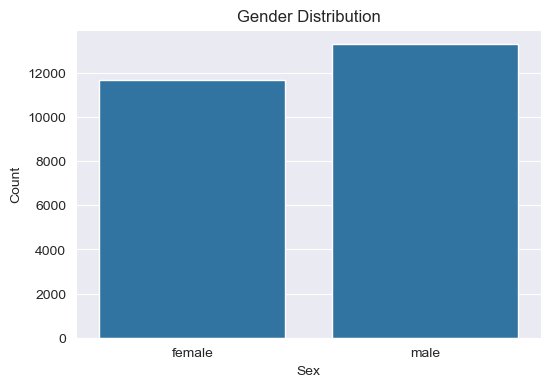

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of age
plt.figure(figsize=(10, 5))
sns.histplot(train_metadata['age_approx'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Countplot for sex
plt.figure(figsize=(6, 4))
sns.countplot(data=train_metadata, x='sex')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Analyze Correlations

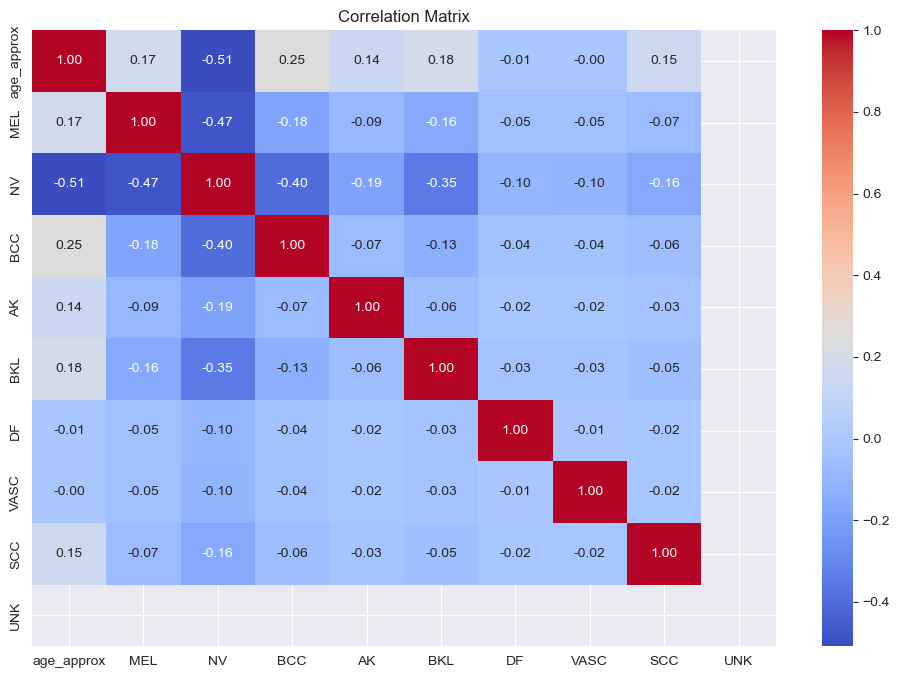

In [14]:
# Merge metadata with ground truth for correlation analysis
train_data = pd.merge(train_metadata, train_ground_truth, on='image')

# Select only numeric columns for correlation analysis
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = train_data[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Examine Categorical Features

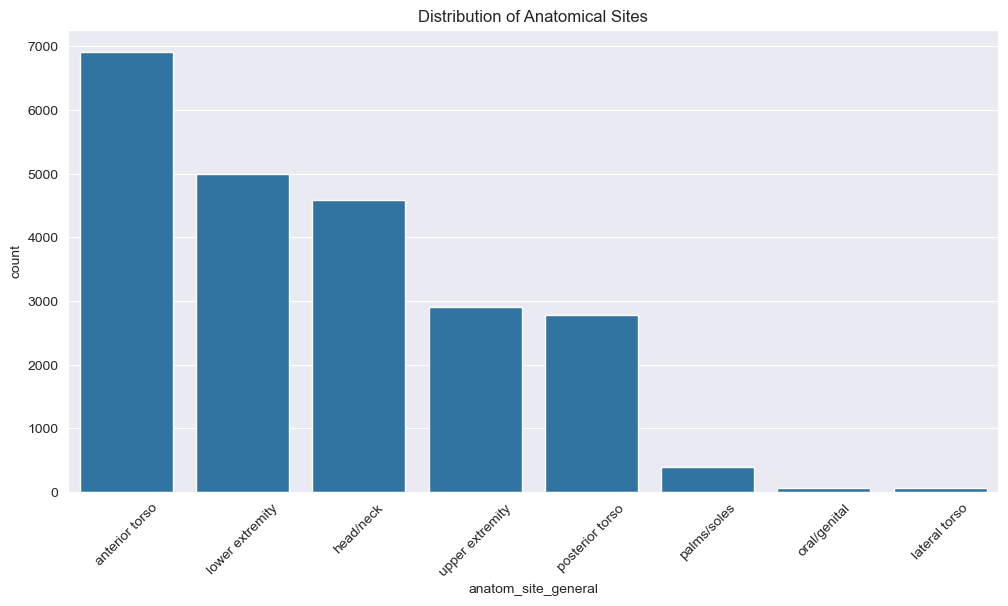

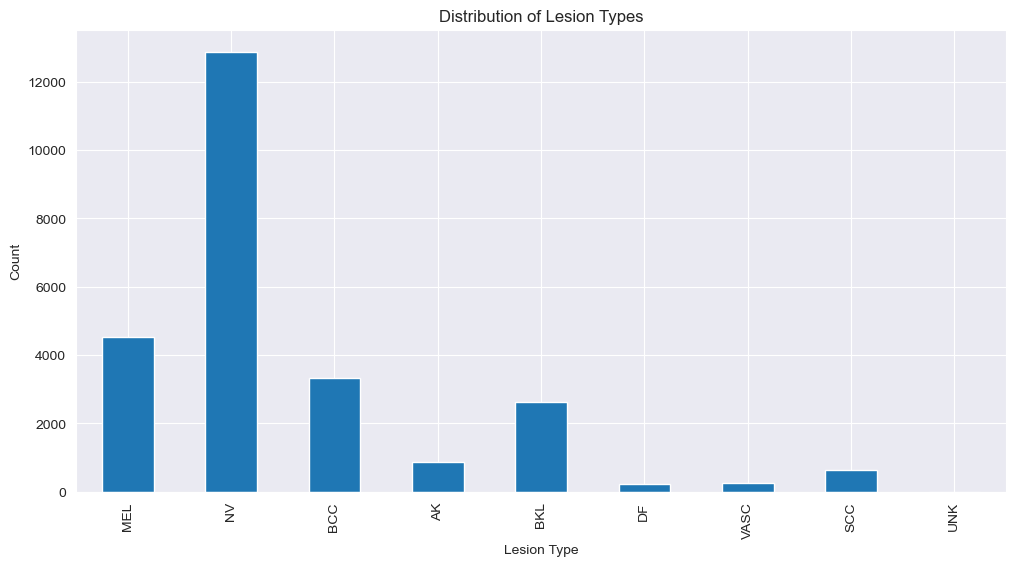

In [15]:
# Countplot for anatomical site
plt.figure(figsize=(12, 6))
sns.countplot(data=train_metadata, x='anatom_site_general', order=train_metadata['anatom_site_general'].value_counts().index)
plt.title('Distribution of Anatomical Sites')
plt.xticks(rotation=45)
plt.show()

# Countplot for lesion types in ground truth
lesion_types = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']
plt.figure(figsize=(12, 6))
train_ground_truth[lesion_types].sum().plot(kind='bar')
plt.title('Distribution of Lesion Types')
plt.xlabel('Lesion Type')
plt.ylabel('Count')
plt.show()

# Identify Outliers

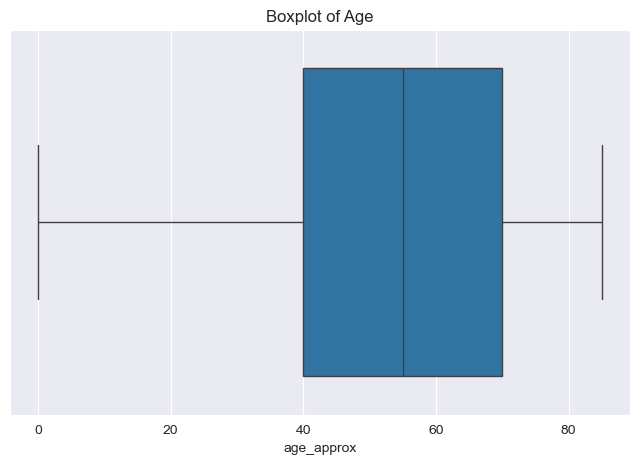

In [16]:
# Boxplot for age
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_metadata, x='age_approx')
plt.title('Boxplot of Age')
plt.show()

# Analyze relationships with target variable

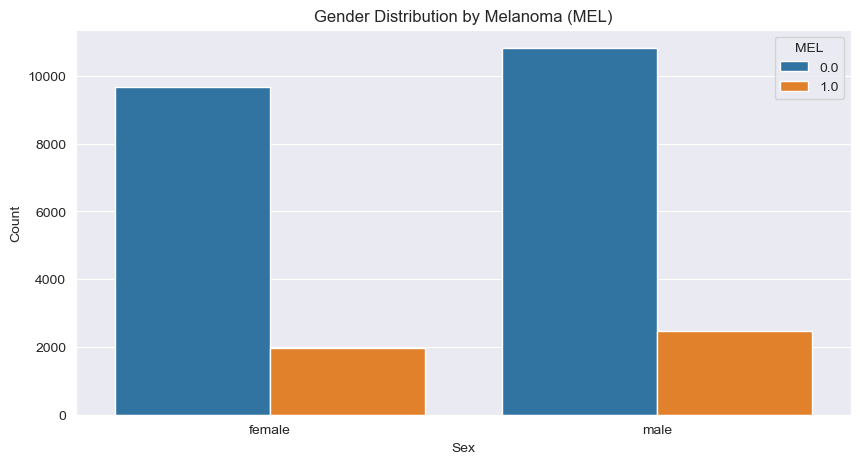

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train_data, x='sex', hue='MEL')  # Example for one lesion type
plt.title('Gender Distribution by Melanoma (MEL)')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='MEL', loc='upper right')
plt.show()

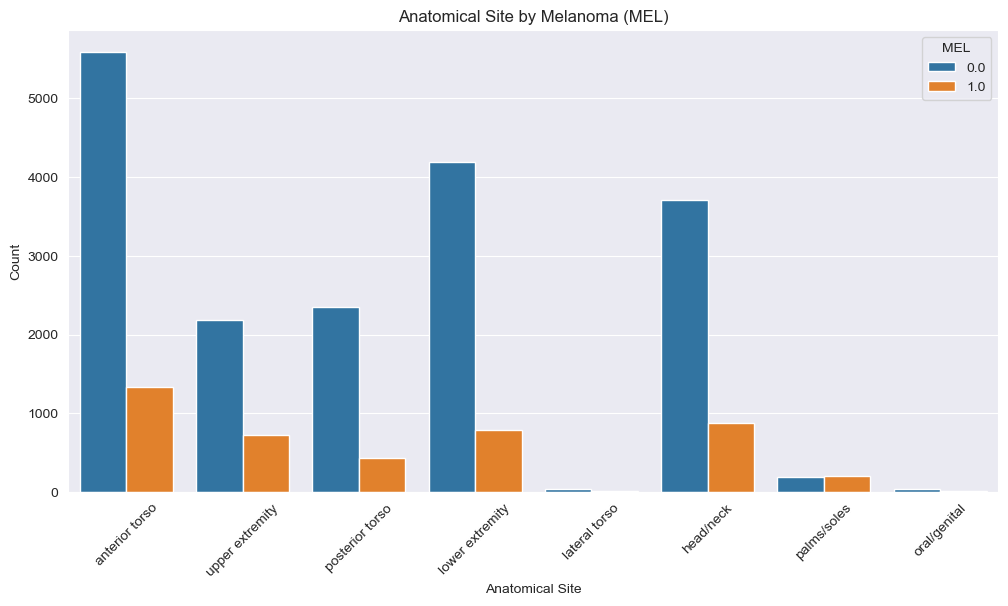

In [27]:
# Countplot for anatomical site by lesion type
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='anatom_site_general', hue='MEL')
plt.title('Anatomical Site by Melanoma (MEL)')
plt.xlabel('Anatomical Site')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='MEL', loc='upper right')
plt.show()